<a href="https://colab.research.google.com/github/inefable12/CQCPE_2023_jesus/blob/main/2A_Autodock_Vina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoDock Vina desde COLAB
Jesus Alvarado-Huayhuaz

Los siguientes archivos te permitirán replicar los resultados de este notebook: https://drive.google.com/drive/folders/1wpd29f1Hr7N0t9CwcAClBS3brXXrBHIu?usp=sharing

## 1. Instalación de Autodock Vina

In [5]:
!wget https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
!tar xzvf autodock_vina_1_1_2_linux_x86.tgz
%cd autodock_vina_1_1_2_linux_x86/bin

--2023-09-08 04:22:31--  https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
Resolving vina.scripps.edu (vina.scripps.edu)... 192.26.252.19
Connecting to vina.scripps.edu (vina.scripps.edu)|192.26.252.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1238242 (1.2M) [application/x-gzip]
Saving to: ‘autodock_vina_1_1_2_linux_x86.tgz’

autodock_vina_1_1_2 100%[===================>]   1.18M  2.76MB/s    in 0.4s    

2023-09-08 04:22:32 (2.76 MB/s) - ‘autodock_vina_1_1_2_linux_x86.tgz’ saved [1238242/1238242]

autodock_vina_1_1_2_linux_x86/
autodock_vina_1_1_2_linux_x86/LICENSE
autodock_vina_1_1_2_linux_x86/bin/
autodock_vina_1_1_2_linux_x86/bin/vina
autodock_vina_1_1_2_linux_x86/bin/vina_split
/content/autodock_vina_1_1_2_linux_x86/bin


Nos dirigimos a la carpeta que contiene el ejecutable

In [9]:
%cd /content/autodock_vina_1_1_2_linux_x86/bin

/content/autodock_vina_1_1_2_linux_x86/bin


## Ligandos

Como sugerencia, coloca los ligandos en pdbqt en esta misma carpeta. Cuando ganes experiencia con esto, solo necesitarás especificar la ruta sin necesidad de mover los archivos así.

In [11]:
# Creamos un txt de los ligandos en formato pdbqt, teniendo cuidado con la proteina
!ls lig_* > inputs.txt
# Convertimos este txt en una lista
f = open("inputs.txt","r")
input_lig_pdbqt = f.read().splitlines()
print(input_lig_pdbqt)

['lig_opt_1.pdbqt', 'lig_opt_2.pdbqt', 'lig_opt_3.pdbqt', 'lig_opt_4.pdbqt']


Luego de hacer la lista de ligandos, adiciona la proteína preparada en esta carpeta

## Docking molecular

Coloca aquí el archivo de configuración brindado en la clase, ya está listo para funcionar, sin embargo, verifica que la proteina contenga esta ruta. Para más información: https://github.com/inefable12/herramientas_basicas/blob/main/Docking_Molecular_VINA.ipynb

In [24]:
# Ejecutamos VINA
for i in input_lig_pdbqt:
  print(i)
  !./vina --ligand {i} --config conf_mpro.txt --log {i}.log

lig_opt_1.pdbqt
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Output will be lig_opt_1_out.pdbqt
Detected 2 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzin

La celda anterior demoró 1 minuto en terminar y los resultados son extraídos a continuación:

In [25]:
import glob
with open('resumen_VS.txt', 'w') as sm:
  for fn in sorted(glob.glob("./*.log")):
    with open(fn) as f:
      flag = False
      for line in f:
        if not flag and '----' in line:
          flag = True
        elif flag:
          flag = False
          cells = line.split()
          sm.write(fn + "    " + cells[1] + "\n")
          break
!cat resumen_VS.txt

./lig_opt_1.pdbqt.log    -5.0
./lig_opt_2.pdbqt.log    -7.5
./lig_opt_3.pdbqt.log    -4.8
./lig_opt_4.pdbqt.log    -4.6


El archivo resumen_VS.txt contiene los resultados, no olvides descargarlo.

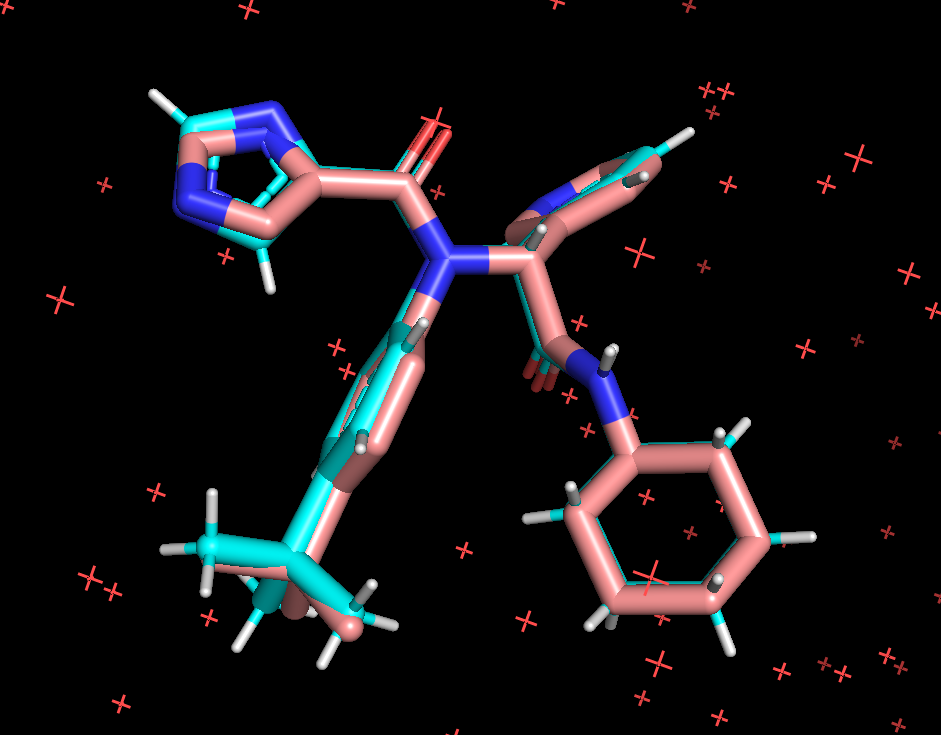

[Imagen] Te invitamos a acoplar el ligando X77 co-cristalizado en 6W63 (https://www.rcsb.org/structure/6W63) y verificar el poder predictivo del docking molecular con Autodock Vina.